In [1]:
#imported all the libraries
import pandas as pd
import nltk
from nltk import word_tokenize

In [2]:
#stopwords collection
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/vd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#import
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
#popular collection
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /Users/vd/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/vd/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /Users/vd/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/vd/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/vd/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/vd/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /Users/

True

In [4]:
#read raw data from local csv to df_raw dataframe
df_raw = pd.read_csv("/Users/vd/Desktop/Spring 2023/PDS/ASSIGNMENT-3/RAW DATA/Corona_NLP_test.csv")

In [5]:
#head data to check
df_raw.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
#check rows n columns
print("No. of rows: {}\nNo. of Cols: {}".format(df_raw.shape[0], df_raw.shape[1]))

No. of rows: 3798
No. of Cols: 6


In [7]:
#to check null values count
df_raw.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [8]:
#dropna values
df_raw.dropna(inplace = True)
print("No. of rows: {}\nNo. of Cols: {}".format(df_raw.shape[0], df_raw.shape[1]))

No. of rows: 2964
No. of Cols: 6


In [9]:
df_raw.index= pd.RangeIndex(start=1, stop=1+len(df_raw), step=1)
df_raw.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral


In [10]:
#check duplicates count
df_raw.duplicated().sum()


0

In [11]:
#since no duplicates and data is clean sending it to cleandata folder
df_raw.to_csv("/Users/vd/Desktop/Spring 2023/PDS/ASSIGNMENT-3/CLEAN DATA/Corona_NLP_test.csv")

In [12]:
df_Orig_Tweet =df_raw['OriginalTweet']

In [13]:
#code to remove all the special chars, URL's and stopwords
#also converting all the chars to lowercase

from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words("english"))
corpus = []
for i in range(1, len(df_Orig_Tweet)):
  review = re.sub(r"https?:[^\s]+", " " ,df_Orig_Tweet[i])
  review = re.sub('[^a-zA-Z]',' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
print(corpus)

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock', 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc', 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc', 'drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus', 'anyone supermarket last days went normal sho

In [15]:
# convert the list to sentences for tokenization
Orig_Tweet_para = ' '.join(str(a) for a in corpus)
print(Orig_Tweet_para)

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus anyone supermarket last days went normal shop last night amp sig

In [16]:
#word tokenization
word_tokenization = nltk.word_tokenize(Orig_Tweet_para)
print(word_tokenization)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'sold', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirus', 'fearing', 'shoppers', 'stock', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', 'becomes', 'bigapple', 'st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon', 'qanon', 'election', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid', 'news', 'corvid', 'newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angeles', 'price

In [17]:
fdist = FreqDist(word_tokenization)

#output 10 popular common words
fdist.most_common(10)

[('covid', 2275),
 ('coronavirus', 1196),
 ('food', 1050),
 ('store', 792),
 ('grocery', 624),
 ('people', 607),
 ('stock', 604),
 ('amp', 494),
 ('supermarket', 413),
 ('shopping', 412)]

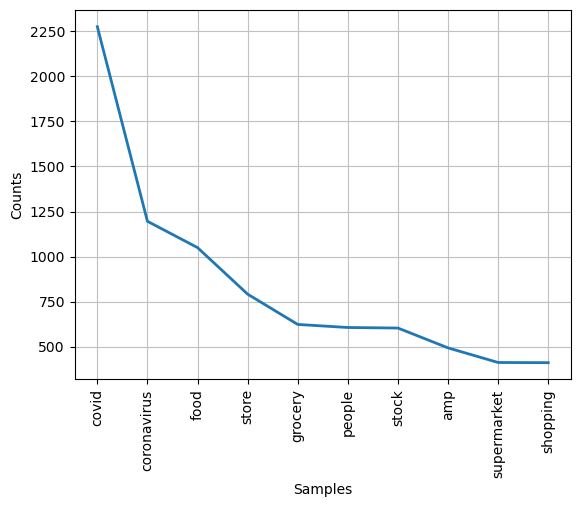

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
#graph for fdist

plt.savefig("/Users/vd/Desktop/Spring 2023/PDS/ASSIGNMENT-3/RESULTS/vd_Image_Frequency.png")
fdist.plot(10)

In [24]:
!pip install wordcloud

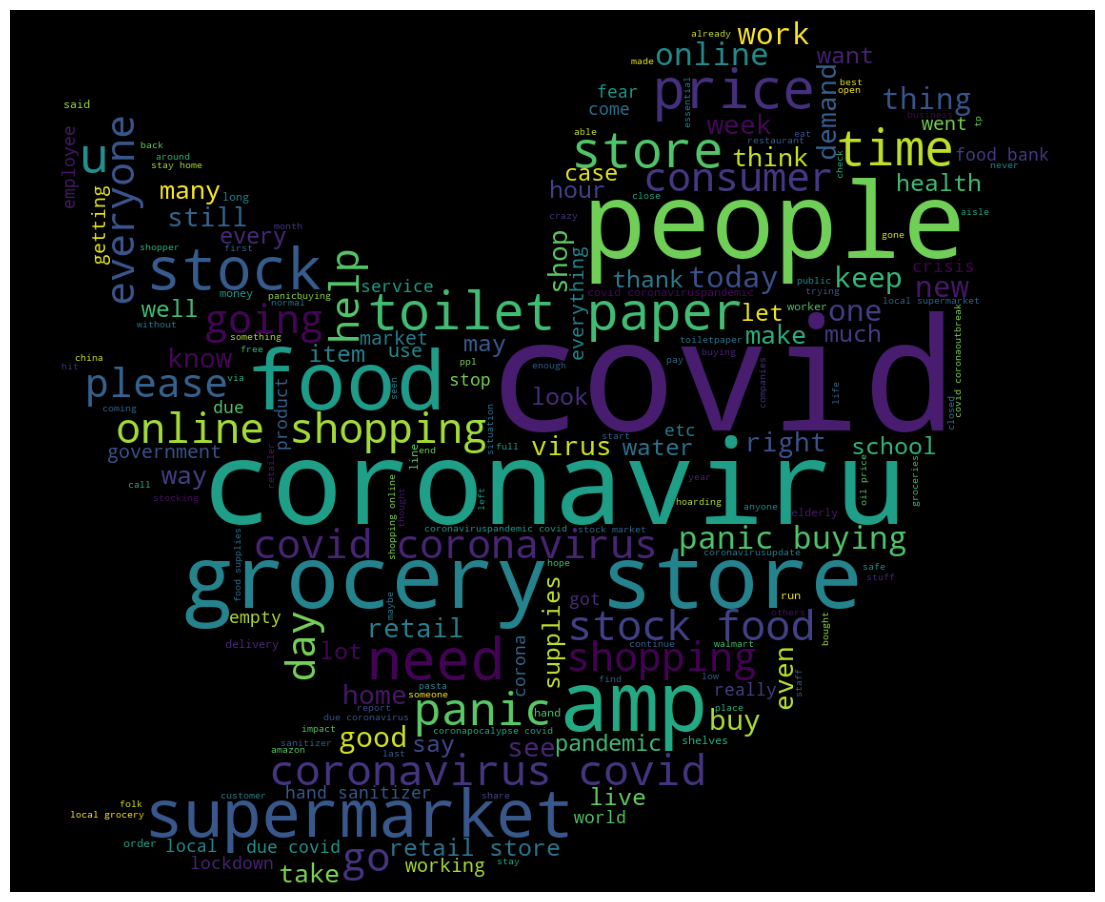

In [26]:
#imports
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image

#pyplot to plot the wordcloud
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

#takes the color of image and reflect the same to the word cloud image
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(Orig_Tweet_para)

#Plot the wordcloud :
plt.figure(figsize = (14, 14)) 
plt.imshow(wordcloud) 

#no axis values
plt.axis("off") 

plt.savefig("/Users/vd/Desktop/Spring 2023/PDS/ASSIGNMENT-3/RESULTS/vd_WordCloud.png")

plt.show()
